In [1]:
# Main module 

import tui
import process        
import os
%matplotlib inline 
import matplotlib.pyplot as plt    


def run():
    #ask the user to enter the file path.
    file_path = input("Enter the file path: ")
    data =[]
    #use os to check file path , call the function load data in the process module if the path exist.
    if os.path.exists(file_path):
        data=process.load_data(file_path)
    else: 
        print('envalid file path')
    tui.completed()
    #while the user selecting one of the options the loop keeps looping and when the user select exit stop the programme.
    running=True
    while running:
        menu_selection = tui.menu()
        
        
        if  menu_selection=='1':
            process.listing_by_id(data)
        elif menu_selection=='2':
            process.listing_for_specified_location(data)
        elif menu_selection =='3': 
            process.listing_by_property_type(data)
        elif menu_selection=='4':
            process.listing_by_location(data)
        elif menu_selection == 'exit':
            running=False
            break
        else:
            tui.error()
            
            

if __name__== "__main__":
    

    run()




Enter the file path: Airbnb_UK_2022.csv
###########################################################################
Operation started: Reading data from file path...

Operation completed.
###########################################################################
select which menu would you like:
    
    [1]   :List name of listing, host name, description, host location, host since by host id.
 
    
    [2]   :List host name, property type, price, minimum_nights and maximum_nights by location.

    
    [3]   :List room type, accommodates, bathrooms, bedroom and beds for a specified property type.

    
    [4]   :List review scores of cleanliness, checkin, communication and rating by location.
                 
    
    [exit]:Exit the programme.
    
your selection: exit


Load the data from CSV file using pandas

In [2]:
import pandas as pd 
#read csv file using pandas.
data=pd.read_csv("Airbnb_UK_2022.csv", header=0)
data.head()
    

,host_id,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,60302,Bright Chelsea Apartment. Chelsea!,lots of windows and light st luke s gardens a...,Philippa,05-12-09,Kensington,within an hour,67%,29%,False,...,89,21-12-09,16-03-20,4.79,4.84,4.88,4.87,4.82,4.93,4.73
1,554519,JESSIE the narrowboat in Little Venice,jessie the narrowboat is moored in the heart o...,Meg,03-05-11,London,within an hour,100%,100%,True,...,581,04-07-11,02-09-22,4.91,4.94,4.90,4.97,4.96,4.98,4.77
2,1481851,Notting Hill church stay in Heaven!,the spaceoverview located min walk away from...,Tania,07-12-11,London,within a few hours,100%,86%,True,...,6,16-07-12,04-07-22,4.83,4.83,5.00,5.00,5.00,5.00,4.83
3,41759,"Battersea live/work artist house, garden communal",artist house bright high ceiling rooms for bo...,Joe,28-09-09,London,within a day,100%,50%,False,...,96,15-11-10,19-07-22,4.90,4.89,4.91,4.90,4.93,4.59,4.65
4,586671,DOUBLE ROOM NEAR CENTRAL LONDON,the spaceone lovely double bed and breakfastro...,Joe,14-05-11,London,within a day,90%,84%,True,...,32,06-07-13,08-09-22,4.91,4.97,4.88,5.00,5.00,4.72,4.88


Data exploration

In [ ]:
#display columns names.
data.columns

In [ ]:
 #discover how many columns and rows the data has using shape method.
data.shape

Identifying the most popular amenities that Airbnb guests are looking for

In [ ]:
#First print amenities column to have an idea about the column.
data['amenities']

In [ ]:
#Use describe on amenities column to find popular amenities (the top).
data['amenities'].describe()


In [ ]:
#Use mode function to get just the popular amenities.
#the most popular amenities are the ones repeated most which is the mode .
popular_amenities=data['amenities'].mode()
popular_amenities

In [3]:
#Use display_amenities function from the tui module to display popular amenities in a list.
process.popular_amenities(data)

###########################################################################
Operation started: display the  most popular amenities:...

the most popular amenities are:['["Washer", "Long term stays allowed", "TV", "Smoke alarm", "Carbon monoxide alarm", "Kitchen", "Wifi"]']
Operation completed.
###########################################################################


Analyse the Average price of stay in each location 

In [ ]:
#First display price and host location to get an idea about the columns.
price_location=data[['price', 'host_location']]
price_location

In [ ]:
data.host_location.nunique()

In [ ]:
data.host_location.value_counts()

In [4]:
#Groupeby host location and calculate the average price for each location.
average_stay_location=data.groupby(['host_location'])['price'].mean()
#Display average price for each location using the function display_average_price from the tui module.
process.average_price_location(data)

###########################################################################
Operation started: display average price by location:...

The average stay in each location:
host_location
Aberdeen          152.333333
Aberystwyth        64.000000
Addington         124.000000
Ascot             300.000000
Ashford            65.375000
                     ...    
Wolverton          87.000000
Woodford           65.333333
Worcester Park     37.000000
Wraysbury          76.000000
York              250.000000
Name: price, Length: 309, dtype: float64
Operation completed.
###########################################################################


In [5]:
#sort the values from to biggest to smallest.
sorted_price=data.groupby(['host_location'])['price'].mean().sort_values(ascending=False)
sorted_price

host_location
Shoreham-by-Sea        2357.50
Rye                     850.00
Horsham                 800.00
Buscot                  700.00
Butterleigh             638.00
                        ...   
Borehamwood              35.00
Mitcham                  33.75
Crediton                 32.00
Staines-upon-Thames      31.00
Rainham                  30.00
Name: price, Length: 309, dtype: float64

Analyse the average review scores rating for each location

In [ ]:
#display host location and review scores values to understand the columns.
data[['host_location', 'review_scores_value']]


In [ ]:
#calculate the count of the review scores value
data.review_scores_value.value_counts()

In [6]:
#Groupby host location and calculate the review scores value for each location.
average_review_score=data.groupby(['host_location'])['review_scores_value'].mean()
#Display the average review scores for each location using the function display_average_review_location from tui module.
process.average_review_location(data)

###########################################################################
Operation started: display the average review scores rating:...

The average review rate score for each location is:
host_location
Aberdeen          4.863333
Aberystwyth       4.550000
Addington         4.710000
Ascot             5.000000
Ashford           4.727500
                    ...   
Wolverton         4.960000
Woodford          4.836667
Worcester Park    4.625000
Wraysbury         4.810000
York              5.000000
Name: review_scores_location, Length: 309, dtype: float64
Operation completed.
###########################################################################


Analyse the relation between super host and the price 

In [ ]:
sorted_score=data.groupby(['host_location'])['review_scores_value'].mean().sort_values(ascending=False)
sorted_score

In [ ]:
#display price and host is superhost column.
data[['host_is_superhost', 'price']]

In [ ]:
#display price and no superhost.
not_super_host=data.loc[data.host_is_superhost ==False,['price', 'host_is_superhost']]
not_super_host

In [ ]:
#display price and no superhost.
super_host=data.loc[data.host_is_superhost ==True,['price', 'host_is_superhost']]
super_host

In [ ]:
#How many not super_host (the count)
number_not_superhost=data.loc[data.host_is_superhost ==False,['host_is_superhost']].count()

In [ ]:
#How many super_host (the count)
number_superhost=data.loc[data.host_is_superhost ==True,['host_is_superhost']].count()

In [7]:
#get the average price of superhost and no superhost 
average_price=data.groupby(['host_is_superhost'])['price'].mean()
#display the average price for not superhost and superhost by calling a function in the tui module.
process.average_price_host_is_superhost(data)


###########################################################################
Operation started: display average price for host is superhost:...

the average price of host is super host or not is:[154.40236686 128.08062771]
Operation completed.
###########################################################################


Display the proportion of number of bedrooms of Airbnb listing using pie chart

In [ ]:
data['bedrooms']

In [14]:
data.groupby('bedrooms').size().sort_values(ascending=False)

bedrooms
1     5593
2     1756
3      741
4      263
5       69
6       15
7        1
10       1
dtype: int64

In [15]:
bedrooms_group=data.groupby('bedrooms').size()

In [16]:
bedrooms_group_list =bedrooms_group.index.tolist()
bedrooms_group_list

[1, 2, 3, 4, 5, 6, 7, 10]

In [17]:
bedrooms_list =bedrooms_group.tolist()
bedrooms_list

[5593, 1756, 741, 263, 69, 15, 1, 1]

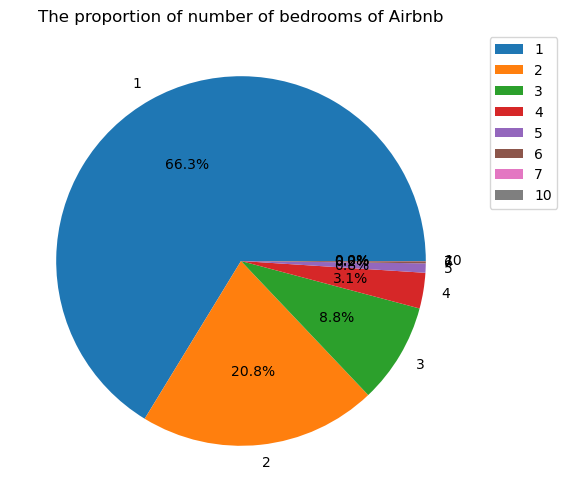

In [18]:
fig = plt.figure(figsize=(10,6))

plt.pie(bedrooms_list ,labels=bedrooms_group_list, autopct='%1.1f%%')
plt.title("The proportion of number of bedrooms of Airbnb")

plt.legend(loc="best",bbox_to_anchor=(1.2,1))

plt.show()

Display the number of listings for each room type using bar chart	

In [ ]:
data['room_type']

In [9]:
listing_names=data['name']
listing_names

0                     Bright Chelsea  Apartment. Chelsea!
1                  JESSIE the narrowboat in Little Venice
2                     Notting Hill church stay in Heaven!
3       Battersea live/work artist house, garden communal
4                         DOUBLE ROOM NEAR CENTRAL LONDON
                              ...                        
8434                 Unique boat living in central London
8435    A Beautiful Room with River Views. CENTRAL LONDON
8436                 Cosy 2 bed and breakfast family home
8437                               River view Tate Modern
8438    Luxury 4 bed and breakfast house, 100m to rive...
Name: name, Length: 8439, dtype: object

In [10]:
listing_room_type = data.groupby('room_type')['name'].count()
listing_room_type

room_type
Hotel room         1
Private room    3010
Shared room       14
home/apt        5414
Name: name, dtype: int64

In [11]:
room_type_group=data.groupby('room_type').size()
x=room_type_group.index.tolist()
x

['Hotel room', 'Private room', 'Shared room', 'home/apt']

In [ ]:
y=listing_room_type.tolist()
y

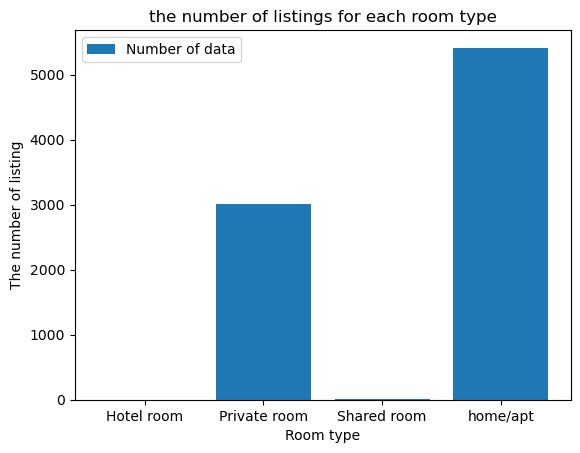

In [12]:
x=room_type_group.index.tolist()
y=listing_room_type.tolist()


fig = plt.figure() 


plt.bar(x,y, label="Number of data")# plotting the graph

plt.xlabel("Room type") # create a label for x-axis
plt.ylabel("The number of listing") # create a label for y-axis

plt.title("the number of listings for each room type") # create a title for your graph 

plt.legend() # create a legend

plt.show() # show the graph

Display the relationship between accommodates and price using scatter plot	

In [ ]:
#accommodates is the maximum capasity of the listing
data['accommodates'] 

In [ ]:
data['price']

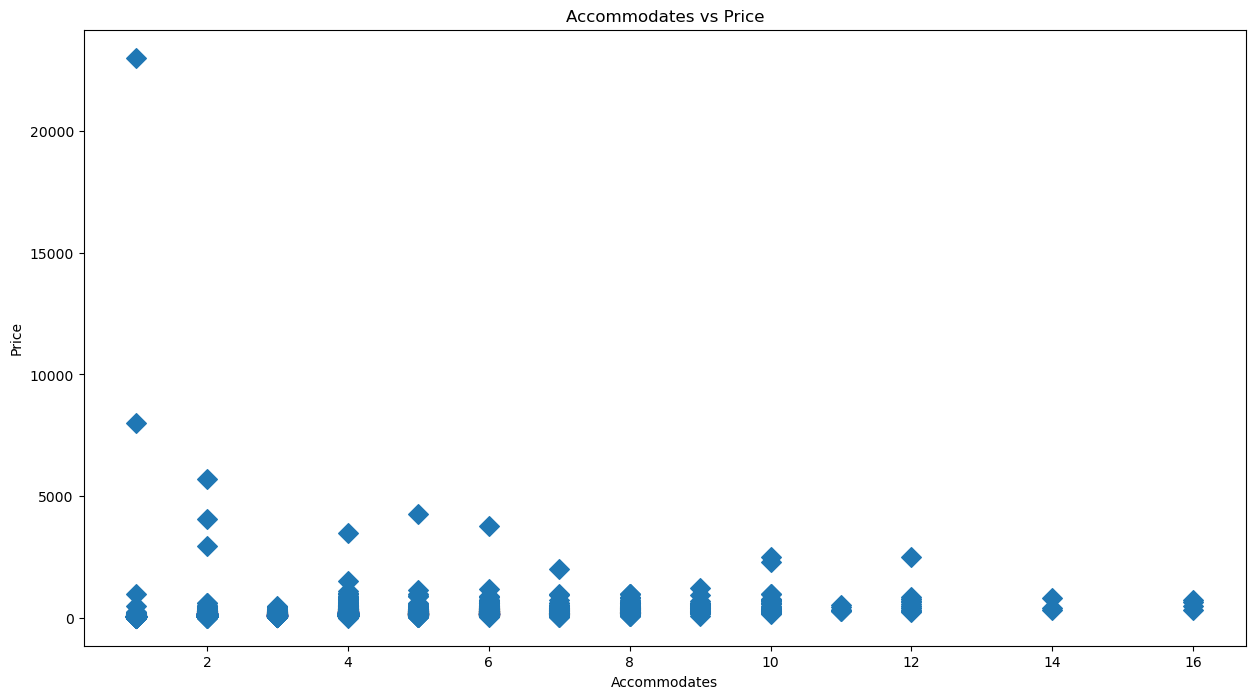

In [7]:
fig = plt.figure(figsize=(15,8)) #Create figure object and set up the size of figure

plt.scatter(data["accommodates"], data["price"], marker='D', s=100)
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Accommodates vs Price')
plt.show()

Display Airbnb prices from 2019 - 2022 with line chart using subplots (one year per plot)

In [3]:
data['host_since'].values

array(['05-12-09', '03-05-11', '07-12-11', ..., '02-07-09', '09-09-11',
       '06-02-12'], dtype=object)

In [4]:
price_year= data.groupby('host_since').size().sort_values(ascending=True)
price_year


host_since
01-01-11     1
16-06-12     1
16-05-22     1
16-05-18     1
16-05-11     1
            ..
16-11-14    12
05-05-15    12
02-07-13    13
17-03-12    18
18-03-12    25
Length: 3007, dtype: int64

In [ ]:
x=price_year.tolist
x

In [5]:
data.sort_values(by = ['host_since'], inplace =False, ascending=False).head()

,host_id,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3764,52840596,Stunning 3 Bedroom Apartment in South London,our beautiful bed and breakfastroom property...,Emma,31-12-15,London,within an hour,100%,100%,False,...,28,04-10-18,23-02-20,4.93,4.89,4.96,4.82,4.86,4.75,4.79
4696,25437413,Private bed and breakfastroom in 3 bed and bre...,a cosy comfortable and bright house great lo...,Fiona,31-12-14,London,within an hour,100%,67%,False,...,4,16-10-19,17-08-22,5.00,5.00,5.00,5.00,5.00,4.75,4.75
1861,4536472,Fashionable quiet 1 bed and breakfastroom flat...,my flat is close to to brockwell park a min...,Stephanie,31-12-12,London,within a day,80%,68%,False,...,45,14-06-16,22-08-22,4.77,4.83,4.76,5.00,4.98,4.56,4.77
7000,429799763,Stylish 2 Bedroom Riverside Townhouse,enjoy a stay at our beautiful modern bed an...,Cat,31-10-21,London,within an hour,100%,100%,False,...,3,17-07-22,31-07-22,4.33,3.67,5.00,4.33,4.67,4.33,4.33
3018,156890619,"Double room in Kensal Rise, South facing.",kensal rise has loads of great cafes bars and...,Andrew,31-10-17,London,within a day,50%,19%,False,...,23,21-01-18,30-11-21,4.59,4.64,4.18,4.77,4.59,4.77,4.59


In [6]:
data.query("host_since >= 01-01-2019 & host_since <= 01-01-2022 ")

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [ ]:
filter_price_year = price_year.loc[lambda x : x > 2019 & x < 2022]

In [ ]:
data.groupby('host_since')['price']